# Example usage of Uniform Sampling

In [1]:
import pta
import matplotlib.pyplot as plt
import math

### Load a SBML model

In [ ]:
model = pta.load_example_model("e_coli_core")
model.reactions.BIOMASS_Ecoli_core_w_GAM.lower_bound = 0.5

### Run uniform sampling on the model

In [ ]:
us_model = pta.UniformSamplingModel.from_cobrapy_model(model)
result = pta.sample_flux_space_uniform(us_model, 1000)
assert result.check_convergence()

### Plot the predicted distributions

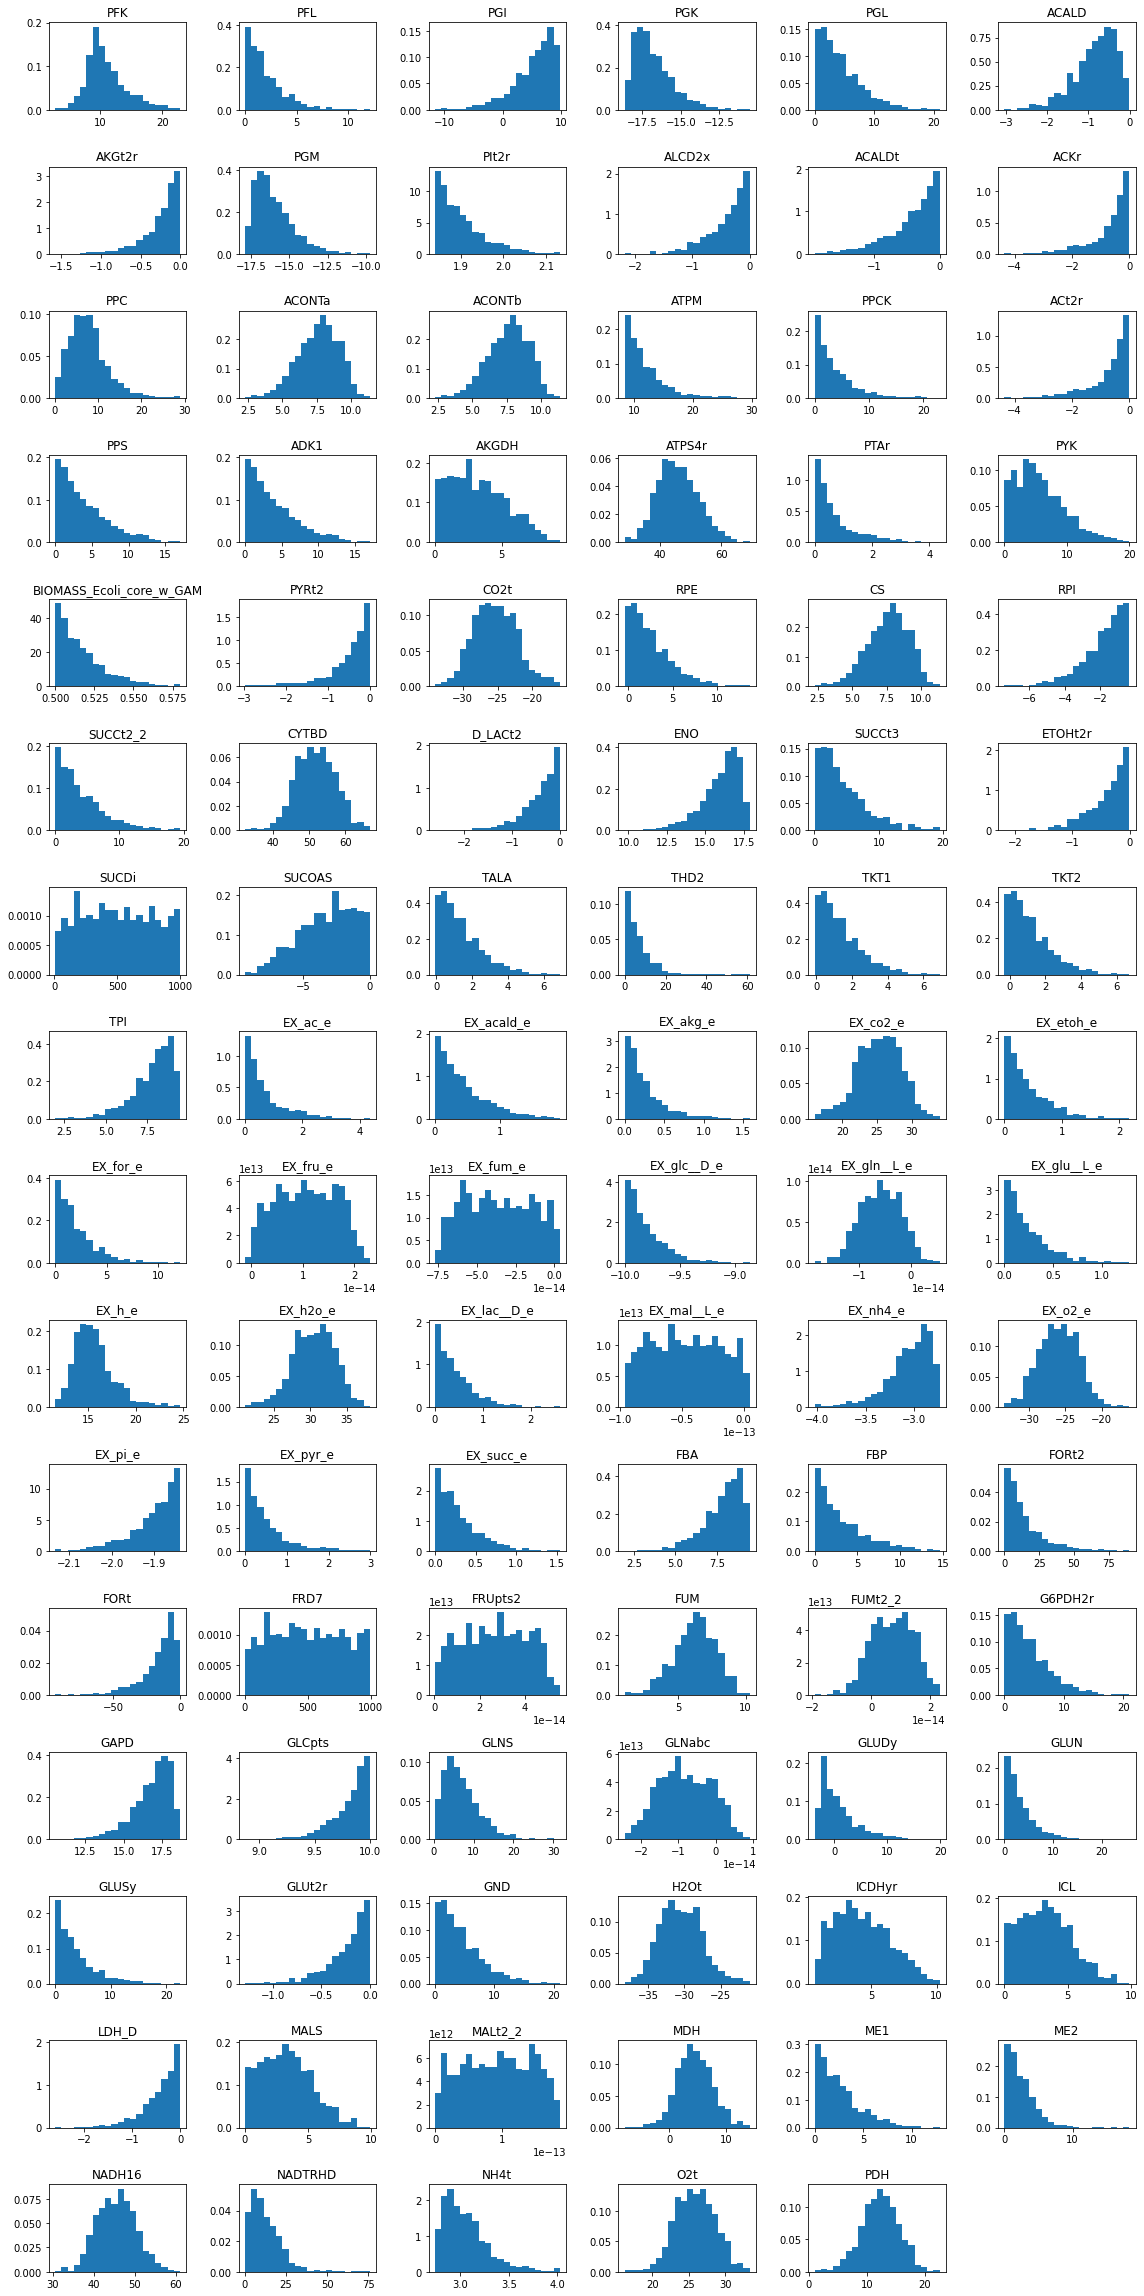

In [4]:
num_rxns = result.samples.shape[1]
n_cols = 6
n_rows = math.ceil(num_rxns / n_cols)

fig=plt.figure(figsize=(16, 2*n_rows))
for i in range(num_rxns):
    ax=fig.add_subplot(n_rows,n_cols,i+1)
    ax.hist(result.samples.iloc[:, i], bins=20, density=True)
    ax.set_title(model.reactions[i].id)
fig.tight_layout()
plt.show()